In [ ]:
import pandas as pd
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import glob
import itertools

from collections import defaultdict

DATASETS = ["reddit", "amazon", "iso_m100_s3"]
PROC_COUNTS = [4, 16, 36, 64, 100, 144]
COMPONENTS = ["total", "scomp", "dcomp", "sbcastrow", "sbcastcol", "dbcastrow", "dbcastcol", "tpose", "epochs"]

# data[EXPERIMENT][EXP_TYPE][MODE]
results = dict()

%matplotlib inline
from six import iteritems
from matplotlib.lines import Line2D

fmarkers=Line2D.filled_markers

plt.style.use('ggplot')

print(DATASETS)
print(COMPONENTS)

for dataset in DATASETS:
    results[dataset] = dict()
    for proc in PROC_COUNTS:
        results[dataset][proc] = dict()
        for comp in COMPONENTS:
             results[dataset][proc][comp] = 0.0

results["reddit"][4]["total"] = 32.1 # NOTE: NOT A REAL TIME. JUST FOR TESTING PLOT SCRIPT
results["reddit"][4]["scomp"] = 21.6
results["reddit"][4]["dcomp"] = 0.97
results["reddit"][4]["sbcastrow"] = 6.39
results["reddit"][4]["sbcastcol"] = 1.77
results["reddit"][4]["dbcastrow"] = 1.21
results["reddit"][4]["dbcastcol"] = 0.10
results["reddit"][4]["tpose"] = 1.1 # NOTE: NOT A REAL TIME
results["reddit"][4]["epochs"] = 100 

results["reddit"][16]["total"] = 17.0 # NOTE: NOT A REAL TIME. JUST FOR TESTING PLOT SCRIPT
results["reddit"][16]["scomp"] = 6.03
results["reddit"][16]["dcomp"] = 0.11
results["reddit"][16]["sbcastrow"] = 4.39
results["reddit"][16]["sbcastcol"] = 4.10
results["reddit"][16]["dbcastrow"] = 0.64
results["reddit"][16]["dbcastcol"] = 0.75
results["reddit"][16]["tpose"] = 0.5 # NOTE: NOT A REAL TIME
results["reddit"][16]["epochs"] = 100 

results["reddit"][36]["total"] = 15.0 # NOTE: NOT A REAL TIME. JUST FOR TESTING PLOT SCRIPT
results["reddit"][36]["scomp"] = 3.90
results["reddit"][36]["dcomp"] = 0.15
results["reddit"][36]["sbcastrow"] = 3.55
results["reddit"][36]["sbcastcol"] = 4.80
results["reddit"][36]["dbcastrow"] = 0.58
results["reddit"][36]["dbcastcol"] = 1.01
results["reddit"][36]["tpose"] = 0.5 # NOTE: NOT A REAL TIME
results["reddit"][36]["epochs"] = 100 

# NOTE: NOT REAL TIMES BELOW. JUST FOR TESTING PLOT SCRIPT
results["reddit"][64]["total"] = 7.0
results["reddit"][64]["scomp"] = 3.90
results["reddit"][64]["dcomp"] = 0.15
results["reddit"][64]["sbcastrow"] = 3.55
results["reddit"][64]["sbcastcol"] = 4.80
results["reddit"][64]["dbcastrow"] = 0.58
results["reddit"][64]["dbcastcol"] = 1.01
results["reddit"][64]["tpose"] = 0.5
results["reddit"][64]["epochs"] = 100 

results["reddit"][100]["total"] = 3.0
results["reddit"][100]["scomp"] = 3.90
results["reddit"][100]["dcomp"] = 0.15
results["reddit"][100]["sbcastrow"] = 3.55
results["reddit"][100]["sbcastcol"] = 4.80
results["reddit"][100]["dbcastrow"] = 0.58
results["reddit"][100]["dbcastcol"] = 1.01
results["reddit"][100]["tpose"] = 0.5
results["reddit"][100]["epochs"] = 100 

results["reddit"][144]["total"] = 1.5
results["reddit"][144]["scomp"] = 3.90
results["reddit"][144]["dcomp"] = 0.15
results["reddit"][144]["sbcastrow"] = 3.55
results["reddit"][144]["sbcastcol"] = 4.80
results["reddit"][144]["dbcastrow"] = 0.58
results["reddit"][144]["dbcastcol"] = 1.01
results["reddit"][144]["tpose"] = 0.5
results["reddit"][144]["epochs"] = 100 


results["amazon"][4]["total"] = 32.1 # NOTE: NOT A REAL TIME. JUST FOR TESTING PLOT SCRIPT
results["amazon"][4]["scomp"] = 21.6
results["amazon"][4]["dcomp"] = 0.97
results["amazon"][4]["sbcastrow"] = 6.39
results["amazon"][4]["sbcastcol"] = 1.77
results["amazon"][4]["dbcastrow"] = 1.21
results["amazon"][4]["dbcastcol"] = 0.10
results["amazon"][4]["tpose"] = 1.1 # NOTE: NOT A REAL TIME
results["amazon"][4]["epochs"] = 100 

results["amazon"][16]["total"] = 17.0 # NOTE: NOT A REAL TIME. JUST FOR TESTING PLOT SCRIPT
results["amazon"][16]["scomp"] = 6.03
results["amazon"][16]["dcomp"] = 0.11
results["amazon"][16]["sbcastrow"] = 4.39
results["amazon"][16]["sbcastcol"] = 4.10
results["amazon"][16]["dbcastrow"] = 0.64
results["amazon"][16]["dbcastcol"] = 0.75
results["amazon"][16]["tpose"] = 0.5 # NOTE: NOT A REAL TIME
results["amazon"][16]["epochs"] = 100 

results["amazon"][36]["total"] = 15.0 # NOTE: NOT A REAL TIME. JUST FOR TESTING PLOT SCRIPT
results["amazon"][36]["scomp"] = 3.90
results["amazon"][36]["dcomp"] = 0.15
results["amazon"][36]["sbcastrow"] = 3.55
results["amazon"][36]["sbcastcol"] = 4.80
results["amazon"][36]["dbcastrow"] = 0.58
results["amazon"][36]["dbcastcol"] = 1.01
results["amazon"][36]["tpose"] = 0.5 # NOTE: NOT A REAL TIME
results["amazon"][36]["epochs"] = 100 

results["amazon"][64]["total"] = 7.0
results["amazon"][64]["scomp"] = 3.90
results["amazon"][64]["dcomp"] = 0.15
results["amazon"][64]["sbcastrow"] = 3.55
results["amazon"][64]["sbcastcol"] = 4.80
results["amazon"][64]["dbcastrow"] = 0.58
results["amazon"][64]["dbcastcol"] = 1.01
results["amazon"][64]["tpose"] = 0.5
results["amazon"][64]["epochs"] = 100 

results["amazon"][100]["total"] = 3.0
results["amazon"][100]["scomp"] = 3.90
results["amazon"][100]["dcomp"] = 0.15
results["amazon"][100]["sbcastrow"] = 3.55
results["amazon"][100]["sbcastcol"] = 4.80
results["amazon"][100]["dbcastrow"] = 0.58
results["amazon"][100]["dbcastcol"] = 1.01
results["amazon"][100]["tpose"] = 0.5
results["amazon"][100]["epochs"] = 100 

results["amazon"][144]["total"] = 1.5
results["amazon"][144]["scomp"] = 3.90
results["amazon"][144]["dcomp"] = 0.15
results["amazon"][144]["sbcastrow"] = 3.55
results["amazon"][144]["sbcastcol"] = 4.80
results["amazon"][144]["dbcastrow"] = 0.58
results["amazon"][144]["dbcastcol"] = 1.01
results["amazon"][144]["tpose"] = 0.5
results["amazon"][144]["epochs"] = 100 

results["iso_m100_s3"][4]["total"] = 32.1 # NOTE: NOT A REAL TIME. JUST FOR TESTING PLOT SCRIPT
results["iso_m100_s3"][4]["scomp"] = 21.6
results["iso_m100_s3"][4]["dcomp"] = 0.97
results["iso_m100_s3"][4]["sbcastrow"] = 6.39
results["iso_m100_s3"][4]["sbcastcol"] = 1.77
results["iso_m100_s3"][4]["dbcastrow"] = 1.21
results["iso_m100_s3"][4]["dbcastcol"] = 0.10
results["iso_m100_s3"][4]["tpose"] = 1.1 # NOTE: NOT A REAL TIME
results["iso_m100_s3"][4]["epochs"] = 100 

results["iso_m100_s3"][16]["total"] = 17.0 # NOTE: NOT A REAL TIME. JUST FOR TESTING PLOT SCRIPT
results["iso_m100_s3"][16]["scomp"] = 6.03
results["iso_m100_s3"][16]["dcomp"] = 0.11
results["iso_m100_s3"][16]["sbcastrow"] = 4.39
results["iso_m100_s3"][16]["sbcastcol"] = 4.10
results["iso_m100_s3"][16]["dbcastrow"] = 0.64
results["iso_m100_s3"][16]["dbcastcol"] = 0.75
results["iso_m100_s3"][16]["tpose"] = 0.5 # NOTE: NOT A REAL TIME
results["iso_m100_s3"][16]["epochs"] = 100 

results["iso_m100_s3"][36]["total"] = 15.0 # NOTE: NOT A REAL TIME. JUST FOR TESTING PLOT SCRIPT
results["iso_m100_s3"][36]["scomp"] = 3.90
results["iso_m100_s3"][36]["dcomp"] = 0.15
results["iso_m100_s3"][36]["sbcastrow"] = 3.55
results["iso_m100_s3"][36]["sbcastcol"] = 4.80
results["iso_m100_s3"][36]["dbcastrow"] = 0.58
results["iso_m100_s3"][36]["dbcastcol"] = 1.01
results["iso_m100_s3"][36]["tpose"] = 0.5 # NOTE: NOT A REAL TIME
results["iso_m100_s3"][36]["epochs"] = 100 

results["iso_m100_s3"][64]["total"] = 7.0
results["iso_m100_s3"][64]["scomp"] = 3.90
results["iso_m100_s3"][64]["dcomp"] = 0.15
results["iso_m100_s3"][64]["sbcastrow"] = 3.55
results["iso_m100_s3"][64]["sbcastcol"] = 4.80
results["iso_m100_s3"][64]["dbcastrow"] = 0.58
results["iso_m100_s3"][64]["dbcastcol"] = 1.01
results["iso_m100_s3"][64]["tpose"] = 0.5
results["iso_m100_s3"][64]["epochs"] = 100 

results["iso_m100_s3"][100]["total"] = 3.0
results["iso_m100_s3"][100]["scomp"] = 3.90
results["iso_m100_s3"][100]["dcomp"] = 0.15
results["iso_m100_s3"][100]["sbcastrow"] = 3.55
results["iso_m100_s3"][100]["sbcastcol"] = 4.80
results["iso_m100_s3"][100]["dbcastrow"] = 0.58
results["iso_m100_s3"][100]["dbcastcol"] = 1.01
results["iso_m100_s3"][100]["tpose"] = 0.5
results["iso_m100_s3"][100]["epochs"] = 100 

results["iso_m100_s3"][144]["total"] = 1.5
results["iso_m100_s3"][144]["scomp"] = 3.90
results["iso_m100_s3"][144]["dcomp"] = 0.15
results["iso_m100_s3"][144]["sbcastrow"] = 3.55
results["iso_m100_s3"][144]["sbcastcol"] = 4.80
results["iso_m100_s3"][144]["dbcastrow"] = 0.58
results["iso_m100_s3"][144]["dbcastcol"] = 1.01
results["iso_m100_s3"][144]["tpose"] = 0.5
results["iso_m100_s3"][144]["epochs"] = 100 

#  Amazon
#  GPUs   Time        scomp     dcomp    sbcastrow    sbcastcol  dbcastrow dbcastcol  tpose
#     4         OOM?
#    16        189.5      12.72        0.79         1.36           107.87          8.74        9.37        20.35
#    36        153.3      17.79        0.62         0.95           80.73            7.73        12.52      19.20
#    64        106.6      20.80        0.64         1.40           53.75            7.40        8.89
#   100
#   144     
# 
# 
# Reddit Numbers
# 100 epochs (s = sparse, d = dense)
#  Procs    scomp     dcomp    sbcastrow    sbcastcol    dbcastrow    dbcastcol
#     4          21.6        0.97          6.39              1.77             1.21           0.10
#    16         6.03        0.11          4.39              4.10             0.64           0.75
#    36         3.90        0.15          3.55              4.80             0.58           1.01
# 
    

In [156]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def barChart(bar_info, series, bar_labels, xLabel="Threads", yLabel="LRB Speedup", logy=False, savePath=None):
    N = len(bar_info[0])
    ind = np.arange(N)
    margin=.15
    width=(1-margin)/len(bar_info)

    plt.figure(figsize=(20, 8), dpi=300)
    ax = plt.subplot()
    if logy:
        ax.set_yscale('log', basey=2)
    for i, values_list in enumerate(bar_info):
        ax.bar(ind+i*width, values_list, width, label=series[i], color=cm.plasma(1.*i/len(bar_info)))

    ax.set_xlabel(xLabel, fontweight='bold', fontsize=32)
    ax.set_ylabel(yLabel, fontweight='bold', fontsize=32)
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    
    ax.set_xticks(ind + (len(bar_info)/2)*width - (width/2), minor=False)
    ax.set_xticklabels(bar_labels)
    ax.legend(loc="upper left", prop={'size':24})

    plt.savefig(savePath, format="pdf", bbox_inches='tight')
    
def plotThroughput():
    fig, axes = plt.subplots(1, len(DATASETS))
    fig.set_size_inches(15, 5)

    cmap = get_cmap(len(PROC_COUNTS))
    N = len(PROC_COUNTS)
    ind = np.arange(N)
    margin=.05
    width = (1 - margin) / len(PROC_COUNTS)
    
    for i, data in enumerate(DATASETS):
        total_times = []
        for j in PROC_COUNTS:
            if float(results[data][j]["total"]) == 0:
                print(f'{data} {j} {results[data][j]["total"]}')
            total_times.append(results[data][j]["total"])

        epochs = results[data][PROC_COUNTS[-1]]["epochs"]
        epoch_p_sec = [epochs / float(t) for t in total_times]
        print(epoch_p_sec)

        axes[i].bar(ind+i*width, epoch_p_sec, width, tick_label=PROC_COUNTS, color=cm.plasma(1.*3/len(PROC_COUNTS)))
        
    axes[0].set_ylabel("Epochs / sec.",fontsize=12)
    for i in range(len(DATASETS)):
        axes[i].set_ylim(ymin=0)
        axes[i].set_xlabel(DATASETS[i],fontsize=12)    
    
    # plt.savefig(title + ".pdf", format="pdf");
    plt.show()
     
def plotBreakdown():
    fig, axes = plt.subplots(1, len(DATASETS))
    fig.set_size_inches(15, 5)
    
    cmap = get_cmap(len(PROC_COUNTS))
    N = len(PROC_COUNTS)
    ind = np.arange(N)
    margin=.15
    width = (1 - margin) / len(PROC_COUNTS)
    
    legend_bars = []
    for i, data in enumerate(DATASETS):
        total_times = []
        prev_comp_times = None
        for k, comp in enumerate(COMPONENTS):
            if comp == "total" or comp == "epochs":
                continue
                      
            comp_times = []
            for j in PROC_COUNTS:
                comp_times.append(results[data][j][comp])

            if k == 0:
                axes[i].bar(ind+i*width, comp_times, width, label=comp, tick_label=PROC_COUNTS, color=cm.plasma(1.*k/len(COMPONENTS)))
            else:
                axes[i].bar(ind+i*width, comp_times, width, label=comp, tick_label=PROC_COUNTS, bottom=prev_comp_times, color=cm.plasma(1.*k/len(COMPONENTS)))
                prev_comp_times = comp_times
        
    axes[0].set_ylabel("Times (sec.)",fontsize=12)
    for i in range(len(DATASETS)):
        axes[i].set_ylim(ymin=0)
        axes[i].set_xlabel(DATASETS[i],fontsize=12)    
    # plt.savefig(mytitle + ".pdf", format="pdf");
    plt.legend(loc="upper right", prop={'size':12})
    plt.show()
     

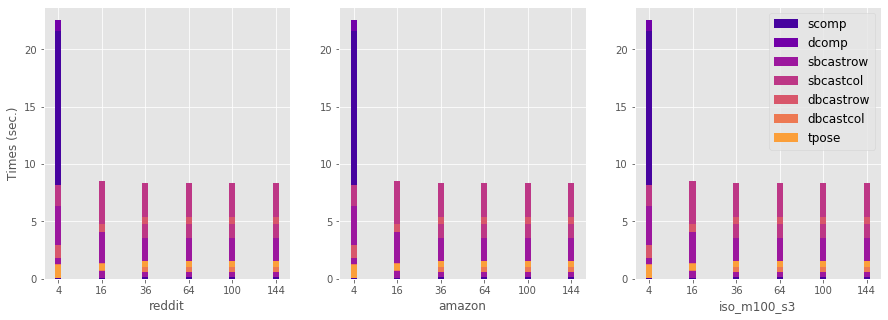

[3.115264797507788, 5.882352941176471, 6.666666666666667, 14.285714285714286, 33.333333333333336, 66.66666666666667]
[3.115264797507788, 5.882352941176471, 6.666666666666667, 14.285714285714286, 33.333333333333336, 66.66666666666667]
[3.115264797507788, 5.882352941176471, 6.666666666666667, 14.285714285714286, 33.333333333333336, 66.66666666666667]


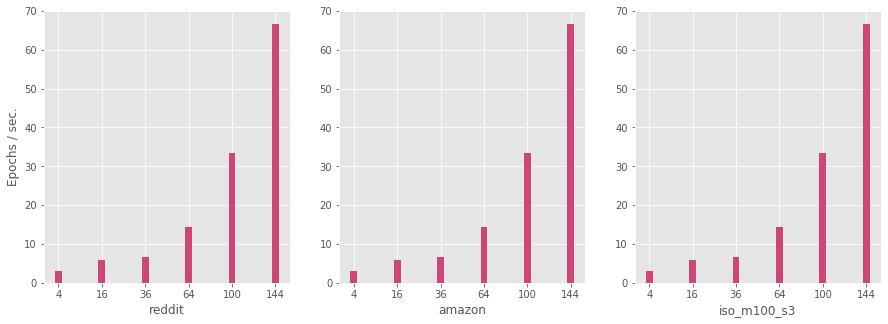

In [157]:
plotBreakdown()
plotThroughput()